In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
datafile='weatherAUS.csv'
weather_df=pd.read_csv(datafile)
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
weather_df.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],inplace=True)

In [5]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
weather_df["Date"]=pd.to_datetime(weather_df["Date"])

In [8]:
weather_df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [9]:
weather_df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [10]:
weather_df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [11]:
weather_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Pressure9am,130395.0,1017.649940,7.106530,980.5,1012.9,1017.6,1022.4,1041.0
Pressure3pm,130432.0,1015.255889,7.037414,977.1,1010.4,1015.2,1020.0,1039.6


In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [14]:
# Create a list of float colums to check for skewing
mask = weather_df.dtypes == np.float
float_cols = weather_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = weather_df[float_cols].skew()

In [15]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Rainfall,9.836225
WindGustSpeed,0.874879
WindSpeed9am,0.777630


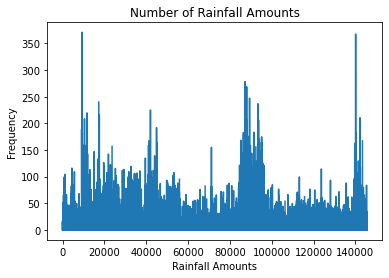

In [16]:
#from matplotlib.pyplot import figure
ax=plt.axes()
ax.plot(weather_df['Rainfall']);
ax.set(xlabel='Rainfall Amounts',ylabel='Frequency',title='Number of Rainfall Amounts');
#plt.figure(figsize=(200,200));

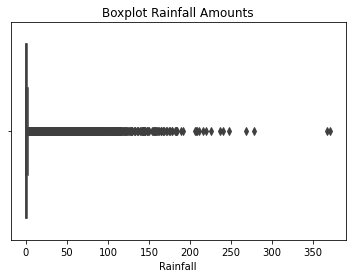

In [17]:
ax=sns.boxplot(x=weather_df['Rainfall'])
ax.set(title='Boxplot Rainfall Amounts');

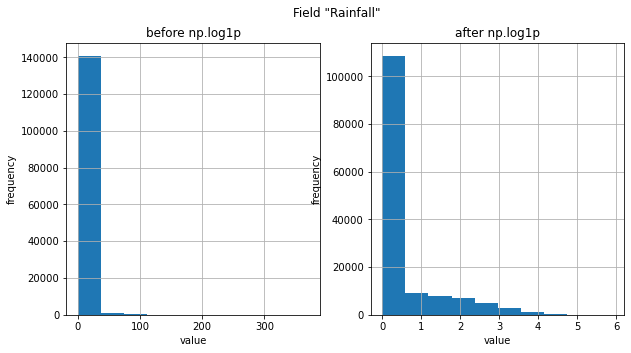

In [18]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Rainfall"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
weather_df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
weather_df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

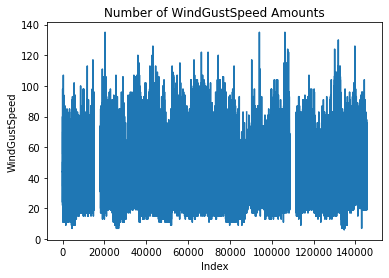

In [19]:
#from matplotlib.pyplot import figure
ax=plt.axes()
ax.plot(weather_df['WindGustSpeed']);
ax.set(xlabel='Index',ylabel='WindGustSpeed',title='Number of WindGustSpeed Amounts');
#plt.figure(figsize=(200,200));

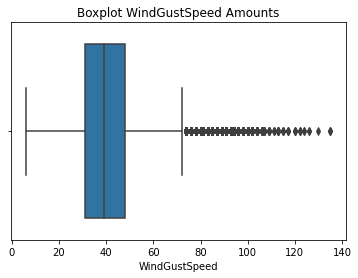

In [20]:
ax=sns.boxplot(x=weather_df['WindGustSpeed'])
ax.set(title='Boxplot WindGustSpeed Amounts');

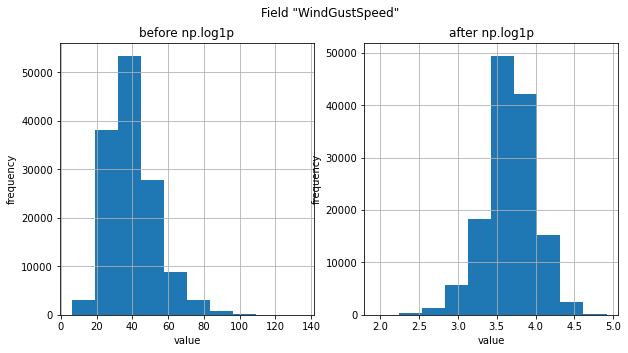

In [21]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "WindGustSpeed"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
weather_df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
weather_df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

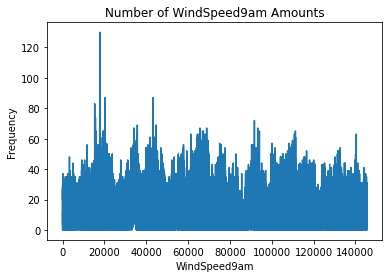

In [22]:
#from matplotlib.pyplot import figure
ax=plt.axes()
ax.plot(weather_df['WindSpeed9am']);
ax.set(xlabel='WindSpeed9am',ylabel='Frequency',title='Number of WindSpeed9am Amounts');
#plt.figure(figsize=(200,200));

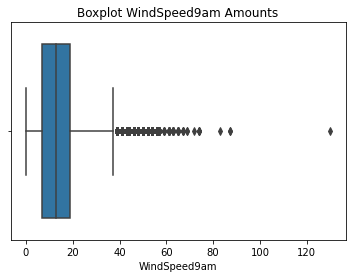

In [23]:
ax=sns.boxplot(x=weather_df['WindSpeed9am'])
ax.set(title='Boxplot WindSpeed9am Amounts');

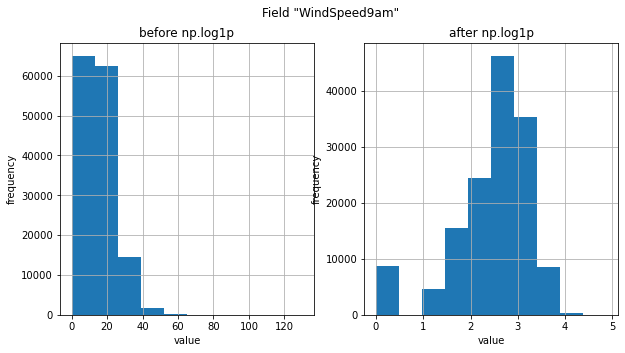

In [24]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "WindSpeed9am"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
weather_df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
weather_df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [25]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "Rainfall":
        continue
    if col == "WindSpeed9am":
        continue
    weather_df[col] = weather_df[col].apply(np.log1p)

In [26]:
# Create a list of float colums to check for skewing
mask = weather_df.dtypes == np.float
float_cols = weather_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = weather_df[float_cols].skew()

In [27]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Rainfall,9.836225
WindSpeed9am,0.777630


In [28]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [29]:
weather_df = weather_df.dropna(subset=['RainToday','RainTomorrow'])
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,3.806662,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,3.806662,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,3.850148,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,3.218876,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,3.737670,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,3.465736,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,3.465736,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,3.135494,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,3.637586,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [30]:
### BEGIN SOLUTION
weather_df_uniques = pd.DataFrame([[i, len(weather_df[i].unique())] for i in weather_df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
weather_df_uniques

,Unique Values
Variable,
Date,3436
Location,49
MinTemp,390
MaxTemp,504
Rainfall,679
WindGustDir,17
WindGustSpeed,68
WindDir9am,17
WindDir3pm,17


In [31]:
binary_variables = list(weather_df_uniques[weather_df_uniques['Unique Values'] == 2].index)
binary_variables

['RainToday', 'RainTomorrow']

In [32]:
ordinal_variables=['WindGustDir','WindDir9am','WindDir3pm']
ordinal_variables

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [33]:
categorical_variable=['Location']
categorical_variable

['Location']

In [34]:
weather_df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
weather_df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [36]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    131624 non-null  object        
 6   WindGustSpeed  131682 non-null  float64       
 7   WindDir9am     131127 non-null  object        
 8   WindDir3pm     137117 non-null  object        
 9   WindSpeed9am   139732 non-null  float64       
 10  WindSpeed3pm   138256 non-null  float64       
 11  Humidity9am    139270 non-null  float64       
 12  Humidity3pm    137286 non-null  float64       
 13  Pressure9am    127044 non-null  float64       
 14  Pressure3pm    127018 non-null  float64       
 15  

In [37]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [38]:
weather_df.WindGustDir.value_counts()
weather_df["WindGustDir"]=weather_df["WindGustDir"].fillna('S')

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/2740352483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindGustDir"]=weather_df["WindGustDir"].fillna('S')


In [39]:
weather_df.WindDir9am.value_counts()
weather_df["WindDir9am"]=weather_df["WindDir9am"].fillna('S')

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/1525245022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindDir9am"]=weather_df["WindDir9am"].fillna('S')


In [40]:
weather_df.WindDir3pm.value_counts()
weather_df["WindDir3pm"]=weather_df["WindDir3pm"].fillna('S')

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/3739610989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindDir3pm"]=weather_df["WindDir3pm"].fillna('S')


In [41]:
mintemp_avg=weather_df["MinTemp"].mean()
mintemp_avg
weather_df["MinTemp"]=weather_df["MinTemp"].fillna(mintemp_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/1887254024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["MinTemp"]=weather_df["MinTemp"].fillna(mintemp_avg)


In [42]:
maxtemp_avg=weather_df["MaxTemp"].mean()
maxtemp_avg
weather_df["MaxTemp"]=weather_df["MaxTemp"].fillna(maxtemp_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/141272093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["MaxTemp"]=weather_df["MaxTemp"].fillna(maxtemp_avg)


In [43]:
windgust_avg=weather_df["WindGustSpeed"].mean()
windgust_avg
weather_df["WindGustSpeed"]=weather_df["WindGustSpeed"].fillna(windgust_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/4071253770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindGustSpeed"]=weather_df["WindGustSpeed"].fillna(windgust_avg)


In [44]:
windspeed9_avg=weather_df["WindSpeed9am"].mean()
windspeed9_avg
weather_df["WindSpeed9am"]=weather_df["WindSpeed9am"].fillna(windspeed9_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/3262667710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindSpeed9am"]=weather_df["WindSpeed9am"].fillna(windspeed9_avg)


In [45]:
windspeed3_avg=weather_df["WindSpeed3pm"].mean()
windspeed3_avg
weather_df["WindSpeed3pm"]=weather_df["WindSpeed3pm"].fillna(windspeed3_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/3136718600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["WindSpeed3pm"]=weather_df["WindSpeed3pm"].fillna(windspeed3_avg)


In [46]:
humid9_avg=weather_df["Humidity9am"].mean()
humid9_avg
weather_df["Humidity9am"]=weather_df["Humidity9am"].fillna(humid9_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/2772552278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Humidity9am"]=weather_df["Humidity9am"].fillna(humid9_avg)


In [47]:
humid3_avg=weather_df["Humidity3pm"].mean()
humid3_avg
weather_df["Humidity3pm"]=weather_df["Humidity3pm"].fillna(humid3_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/4287107866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Humidity3pm"]=weather_df["Humidity3pm"].fillna(humid3_avg)


In [48]:
press9_avg=weather_df["Pressure9am"].mean()
press9_avg
weather_df["Pressure9am"]=weather_df["Pressure9am"].fillna(press9_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/347091797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Pressure9am"]=weather_df["Pressure9am"].fillna(press9_avg)


In [49]:
press3_avg=weather_df["Pressure3pm"].mean()
press3_avg
weather_df["Pressure3pm"]=weather_df["Pressure3pm"].fillna(press3_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/672060860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Pressure3pm"]=weather_df["Pressure3pm"].fillna(press3_avg)


In [50]:
temp9_avg=weather_df["Temp9am"].mean()
temp9_avg
weather_df["Temp9am"]=weather_df["Temp9am"].fillna(temp9_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/388519839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Temp9am"]=weather_df["Temp9am"].fillna(temp9_avg)


In [51]:
temp3_avg=weather_df["Temp3pm"].mean()
temp3_avg
weather_df["Temp3pm"]=weather_df["Temp3pm"].fillna(temp3_avg)

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/2479749966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Temp3pm"]=weather_df["Temp3pm"].fillna(temp3_avg)


In [52]:
weather_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [53]:
weather_df.WindSpeed3pm.unique()

array([24.        , 22.        , 26.        ,  9.        , 20.        ,
       17.        , 28.        , 11.        ,  6.        , 13.        ,
       19.        , 30.        , 31.        ,  7.        , 15.        ,
       48.        ,  4.        , 33.        ,  0.        ,  2.        ,
       18.63114078, 37.        , 46.        , 39.        , 50.        ,
       35.        , 44.        , 41.        , 43.        , 56.        ,
       61.        , 54.        , 52.        , 83.        , 65.        ,
       78.        , 57.        , 63.        , 59.        , 74.        ,
       72.        , 69.        , 76.        , 87.        , 67.        ])

In [54]:
# Create a list of float colums to check for skewing
mask = weather_df.dtypes == np.float
float_cols = weather_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = weather_df[float_cols].skew()

In [55]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Rainfall,9.888061
WindSpeed9am,0.777435


In [56]:
[[i, list(weather_df[i].unique())] for i in categorical_variable]

[['Location',
  ['Albury',
   'BadgerysCreek',
   'Cobar',
   'CoffsHarbour',
   'Moree',
   'Newcastle',
   'NorahHead',
   'NorfolkIsland',
   'Penrith',
   'Richmond',
   'Sydney',
   'SydneyAirport',
   'WaggaWagga',
   'Williamtown',
   'Wollongong',
   'Canberra',
   'Tuggeranong',
   'MountGinini',
   'Ballarat',
   'Bendigo',
   'Sale',
   'MelbourneAirport',
   'Melbourne',
   'Mildura',
   'Nhil',
   'Portland',
   'Watsonia',
   'Dartmoor',
   'Brisbane',
   'Cairns',
   'GoldCoast',
   'Townsville',
   'Adelaide',
   'MountGambier',
   'Nuriootpa',
   'Woomera',
   'Albany',
   'Witchcliffe',
   'PearceRAAF',
   'PerthAirport',
   'Perth',
   'SalmonGums',
   'Walpole',
   'Hobart',
   'Launceston',
   'AliceSprings',
   'Darwin',
   'Katherine',
   'Uluru']]]

In [57]:
### BEGIN SOLUTION
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [58]:
lb=LabelBinarizer()
for column in binary_variables:
    weather_df[column] = lb.fit_transform(weather_df[column])

/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/1458639737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df[column] = lb.fit_transform(weather_df[column])
/var/folders/tg/rmxk2c253j79s8kp2zgx9tch0000gn/T/ipykernel_4407/1458639737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df[column] = lb.fit_transform(weather_df[column])


In [59]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,3.806662,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,3.806662,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,3.850148,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,3.218876,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,3.737670,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,3.465736,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,3.465736,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,3.135494,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,3.637586,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [60]:
weather_df = pd.get_dummies(weather_df, columns = categorical_variable, drop_first=True)

In [61]:
print("weather_df.shape: ",weather_df.shape)
weather_df.info()

weather_df.shape:  (140787, 66)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 66 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       140787 non-null  datetime64[ns]
 1   MinTemp                    140787 non-null  float64       
 2   MaxTemp                    140787 non-null  float64       
 3   Rainfall                   140787 non-null  float64       
 4   WindGustDir                140787 non-null  object        
 5   WindGustSpeed              140787 non-null  float64       
 6   WindDir9am                 140787 non-null  object        
 7   WindDir3pm                 140787 non-null  object        
 8   WindSpeed9am               140787 non-null  float64       
 9   WindSpeed3pm               140787 non-null  float64       
 10  Humidity9am                140787 non-null  float64       
 11  Humidity3pm         

In [62]:
weather_df.dtypes.value_counts()

uint8             48
float64           12
object             3
int64              2
datetime64[ns]     1
dtype: int64

In [63]:
weather_df.drop(columns=["Date"],inplace=True)
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,W,3.806662,W,WNW,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,WNW,3.806662,NNW,WSW,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,WSW,3.850148,W,WSW,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,NE,3.218876,SE,E,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,W,3.737670,ENE,NW,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,3.465736,ESE,E,15.0,13.0,59.0,...,0,0,1,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,E,3.465736,SE,ENE,13.0,11.0,51.0,...,0,0,1,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,NNW,3.135494,SE,N,13.0,9.0,56.0,...,0,0,1,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,N,3.637586,SE,WNW,9.0,9.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
oe=OrdinalEncoder(categories=[['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']])

In [65]:
weather_df['WindGustDir']=oe.fit_transform(weather_df.loc[:,['WindGustDir']])

In [66]:
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,12.0,3.806662,W,WNW,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,13.0,3.806662,NNW,WSW,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,11.0,3.850148,W,WSW,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,2.0,3.218876,SE,E,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,12.0,3.737670,ENE,NW,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.0,3.465736,ESE,E,15.0,13.0,59.0,...,0,0,1,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.0,3.465736,SE,ENE,13.0,11.0,51.0,...,0,0,1,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,15.0,3.135494,SE,N,13.0,9.0,56.0,...,0,0,1,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,0.0,3.637586,SE,WNW,9.0,9.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
weather_df['WindDir9am']=oe.fit_transform(weather_df.loc[:,['WindDir9am']])
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,12.0,3.806662,12.0,WNW,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,13.0,3.806662,15.0,WSW,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,11.0,3.850148,12.0,WSW,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,2.0,3.218876,6.0,E,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,12.0,3.737670,3.0,NW,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.0,3.465736,5.0,E,15.0,13.0,59.0,...,0,0,1,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.0,3.465736,6.0,ENE,13.0,11.0,51.0,...,0,0,1,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,15.0,3.135494,6.0,N,13.0,9.0,56.0,...,0,0,1,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,0.0,3.637586,6.0,WNW,9.0,9.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
weather_df['WindDir3pm']=oe.fit_transform(weather_df.loc[:,['WindDir3pm']])
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,12.0,3.806662,12.0,13.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,13.0,3.806662,15.0,11.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,11.0,3.850148,12.0,11.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,2.0,3.218876,6.0,4.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,12.0,3.737670,3.0,14.0,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.0,3.465736,5.0,4.0,15.0,13.0,59.0,...,0,0,1,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.0,3.465736,6.0,3.0,13.0,11.0,51.0,...,0,0,1,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,15.0,3.135494,6.0,0.0,13.0,9.0,56.0,...,0,0,1,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,0.0,3.637586,6.0,13.0,9.0,9.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
weather_df.dtypes.value_counts()

uint8      48
float64    15
int64       2
dtype: int64

In [70]:
print("weather_df.shape: ",weather_df.shape)
weather_df.info()

weather_df.shape:  (140787, 65)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 65 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    140787 non-null  float64
 1   MaxTemp                    140787 non-null  float64
 2   Rainfall                   140787 non-null  float64
 3   WindGustDir                140787 non-null  float64
 4   WindGustSpeed              140787 non-null  float64
 5   WindDir9am                 140787 non-null  float64
 6   WindDir3pm                 140787 non-null  float64
 7   WindSpeed9am               140787 non-null  float64
 8   WindSpeed3pm               140787 non-null  float64
 9   Humidity9am                140787 non-null  float64
 10  Humidity3pm                140787 non-null  float64
 11  Pressure9am                140787 non-null  float64
 12  Pressure3pm                140787 non-null  float64
 1

In [71]:
weather_df.RainTomorrow.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [72]:
#sns.pairplot(weather_df)
weather_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_Albany',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Locatio

In [73]:
### BEGIN SOLUTION
# All data columns except for color
feature_cols = [x for x in weather_df.columns if x != 'RainTomorrow']

In [74]:
target='RainTomorrow'

In [75]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

X=weather_df[feature_cols]
y=weather_df[target]

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(weather_df[feature_cols], weather_df['RainTomorrow']))
# Create the dataframes
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_test  = X.iloc[test_idx]
y_test  = y.iloc[test_idx]

In [76]:
print(train_idx.shape)
print(test_idx.shape)

(98550,)
(42237,)


In [77]:
y_train.value_counts(normalize=True)

0    0.778376
1    0.221624
Name: RainTomorrow, dtype: float64

In [78]:
y_test.value_counts(normalize=True)

0    0.778393
1    0.221607
Name: RainTomorrow, dtype: float64

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [163]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train_ss, y_train)

In [164]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train_ss, y_train)

In [165]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train_ss, y_train)
### END SOLUTION

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("logistic_regression_l1", LogisticRegression())])

params = {
    "logistic_regression_l1__C": [.00001,.001,.01,.1,1,5,7,9,10,15,30],
    'logistic_regression_l1__penalty':['l1'],
    'logistic_regression_l1__solver':['liblinear']
}

grid = GridSearchCV(estimator, params,cv=4)

In [167]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'logistic_regression_l1', 'logistic_regression_l1__C', 'logistic_regression_l1__class_weight', 'logistic_regression_l1__dual', 'logistic_regression_l1__fit_intercept', 'logistic_regression_l1__intercept_scaling', 'logistic_regression_l1__l1_ratio', 'logistic_regression_l1__max_iter', 'logistic_regression_l1__multi_class', 'logistic_regression_l1__n_jobs', 'logistic_regression_l1__penalty', 'logistic_regression_l1__random_state', 'logistic_regression_l1__solver', 'logistic_regression_l1__tol', 'logistic_regression_l1__verbose', 'logistic_regression_l1__warm_start'])

In [168]:
grid.fit(X_train_ss,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('logistic_regression_l1',
                                        LogisticRegression())]),
             param_grid={'logistic_regression_l1__C': [1e-05, 0.001, 0.01, 0.1,
                                                       1, 5, 7, 9, 10, 15, 30],
                         'logistic_regression_l1__penalty': ['l1'],
                         'logistic_regression_l1__solver': ['liblinear']})

In [169]:
grid.best_score_, grid.best_params_

(0.8467579883333224,
 {'logistic_regression_l1__C': 0.1,
  'logistic_regression_l1__penalty': 'l1',
  'logistic_regression_l1__solver': 'liblinear'})

In [170]:
y_predict_opt = grid.predict(X_test_ss)

In [171]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
accuracy_score(y_test,y_predict_opt)
print(classification_report(y_test,y_predict_opt))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32877
           1       0.73      0.50      0.60      9360

    accuracy                           0.85     42237
   macro avg       0.80      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



In [172]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator2 = Pipeline([('logistic_regression_l2', LogisticRegression())])

params2 = {
    'logistic_regression_l2__C': [.00001,.001,.01,.1,1,5,7,9,10,15,30],
    'logistic_regression_l2__penalty':['l2'],
    'logistic_regression_l2__solver':['liblinear']
}

grid2 = GridSearchCV(estimator2, params2,cv=4)

In [173]:
estimator2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'logistic_regression_l2', 'logistic_regression_l2__C', 'logistic_regression_l2__class_weight', 'logistic_regression_l2__dual', 'logistic_regression_l2__fit_intercept', 'logistic_regression_l2__intercept_scaling', 'logistic_regression_l2__l1_ratio', 'logistic_regression_l2__max_iter', 'logistic_regression_l2__multi_class', 'logistic_regression_l2__n_jobs', 'logistic_regression_l2__penalty', 'logistic_regression_l2__random_state', 'logistic_regression_l2__solver', 'logistic_regression_l2__tol', 'logistic_regression_l2__verbose', 'logistic_regression_l2__warm_start'])

In [174]:
grid2.fit(X_train_ss,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('logistic_regression_l2',
                                        LogisticRegression())]),
             param_grid={'logistic_regression_l2__C': [1e-05, 0.001, 0.01, 0.1,
                                                       1, 5, 7, 9, 10, 15, 30],
                         'logistic_regression_l2__penalty': ['l2'],
                         'logistic_regression_l2__solver': ['liblinear']})

In [175]:
grid2.best_score_, grid2.best_params_

(0.8467884324107117,
 {'logistic_regression_l2__C': 0.1,
  'logistic_regression_l2__penalty': 'l2',
  'logistic_regression_l2__solver': 'liblinear'})

In [176]:
y_predict_opt2 = grid2.predict(X_test_ss)

In [177]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
accuracy_score(y_test,y_predict_opt2)
print(classification_report(y_test,y_predict_opt2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32877
           1       0.73      0.50      0.60      9360

    accuracy                           0.85     42237
   macro avg       0.80      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



coeffs.T

coeff_label

mod.coef_

### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients0 = list()
coefficients1 = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label0 = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [0]])
    coeff_label1 = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [1]])
    coefficients0=pd.DataFrame(coefficients0.append(pd.DataFrame(coeffs.T, columns=coeff_label0)))
    coefficients1=pd.DataFrame(coefficients1.append(pd.DataFrame(coeffs.T, columns=coeff_label1)))
    
frames=[coefficients0,coefficients1]
coefficients=pd.concat(frames,axis=1)

coefficients

fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

In [243]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

#coeff_labels = ['lr', 'l1', 'l2']
coeff_labels = ['lr', 'l1', 'l2','lr_l1_opt','lr_l2_opt']
#coeff_models = [lr, lr_l1, lr_l2]
coeff_models = [lr, lr_l1, lr_l2,grid,grid2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test_ss), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test_ss).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head(-1)

,lr,l1,l2,lr_l1_opt,lr_l2_opt
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
42231,0,0,0,0,0
42232,1,1,1,1,1
42233,0,0,0,0,0
42234,0,0,0,0,0


In [244]:
y_prob.head()
### END SOLUTION

,lr,l1,l2,lr_l1_opt,lr_l2_opt
0,0.752381,0.753492,0.754132,0.750849,0.753203
1,0.925187,0.922552,0.925207,0.923839,0.925195
2,0.968009,0.966259,0.967054,0.967258,0.967581
3,0.967335,0.966586,0.966826,0.966951,0.967109
4,0.996718,0.996483,0.996614,0.996609,0.996672


In [245]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [246]:
metrics
### END SOLUTION

,lr,l1,l2,lr_l1_opt,lr_l2_opt
precision,0.838684,0.839524,0.839299,0.839243,0.839047
recall,0.848379,0.849090,0.848900,0.848853,0.848687
fscore,0.837629,0.838242,0.838095,0.837979,0.837880
accuracy,0.848379,0.849090,0.848900,0.848853,0.848687
auc,0.724622,0.725040,0.724994,0.724658,0.724743


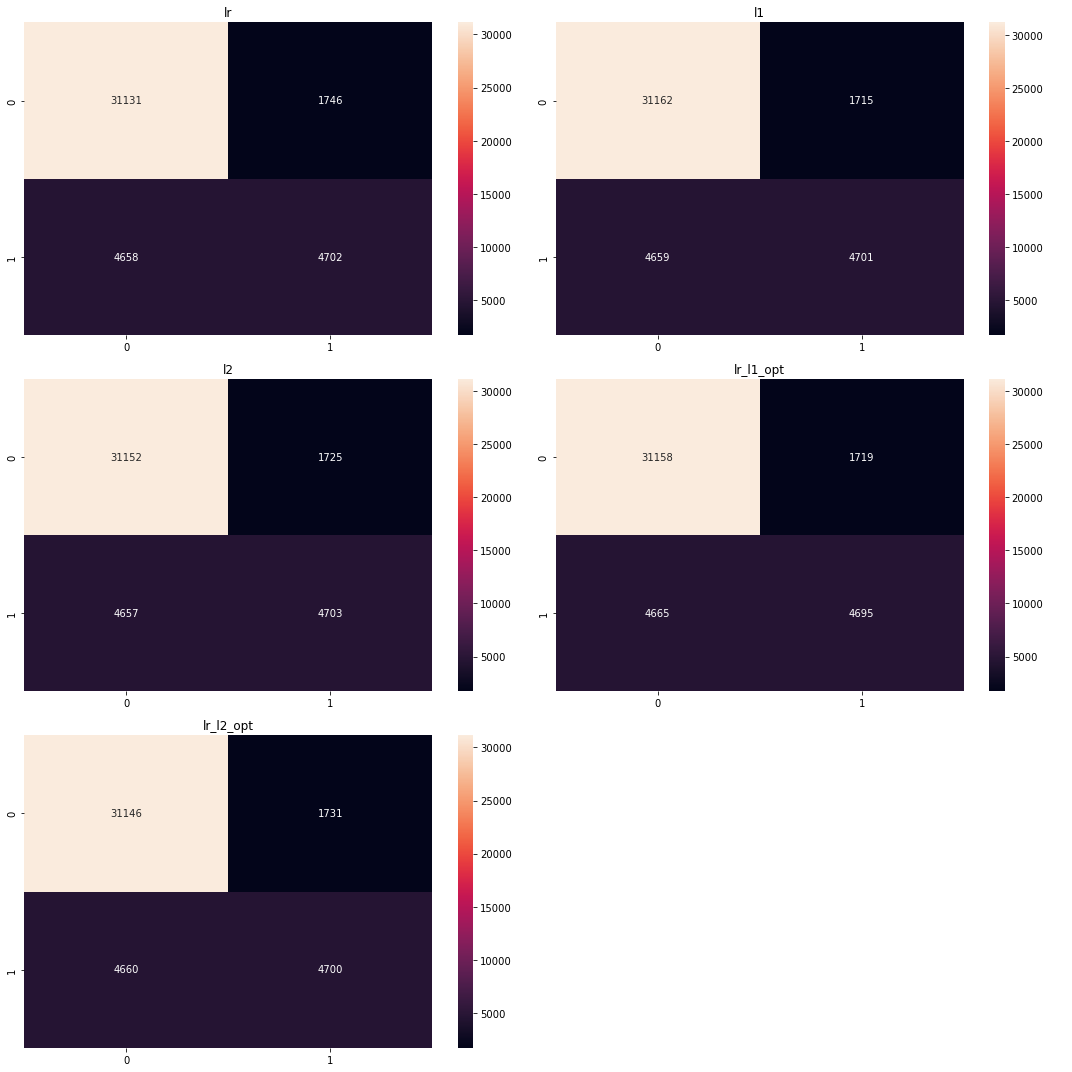

In [247]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(15, 15)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    #sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
### BEGIN SOLUTION
max_k = 20
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    print("Running Iteration",k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train_ss, y_train)
    
    y_pred = knn.predict(X_test_ss)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Running Iteration 1
Running Iteration 2
Running Iteration 3
Running Iteration 4
Running Iteration 5
Running Iteration 6
Running Iteration 7
Running Iteration 8
Running Iteration 9
Running Iteration 10
Running Iteration 11
Running Iteration 12
Running Iteration 13
Running Iteration 14
Running Iteration 15
Running Iteration 16
Running Iteration 17
Running Iteration 18
Running Iteration 19


Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

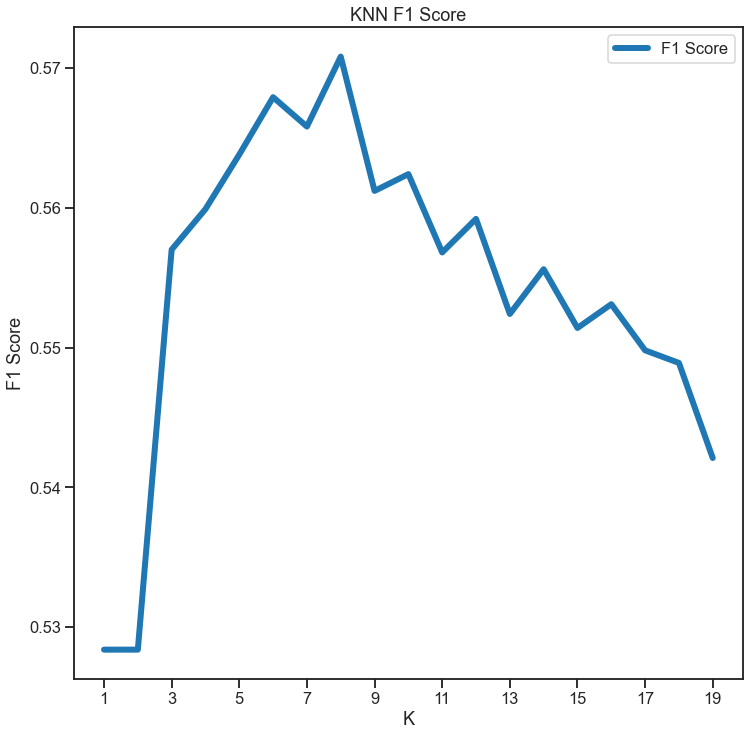

In [82]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
#plt.savefig('knn_f1.png')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

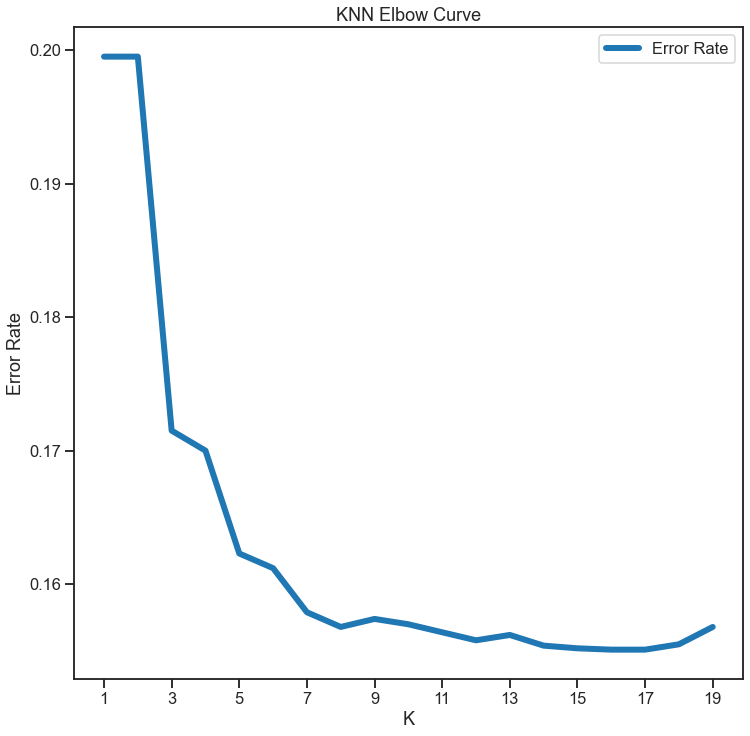

In [83]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')
### END SOLUTION

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(X_train_ss, y_train)
y_pred = knn.predict(X_test_ss)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     32877
           1       0.77      0.40      0.52      9360

    accuracy                           0.84     42237
   macro avg       0.81      0.68      0.71     42237
weighted avg       0.83      0.84      0.82     42237

Accuracy score:  0.84
F1 Score:  0.52


Text(0.5, 76.5, 'Ground Truth')

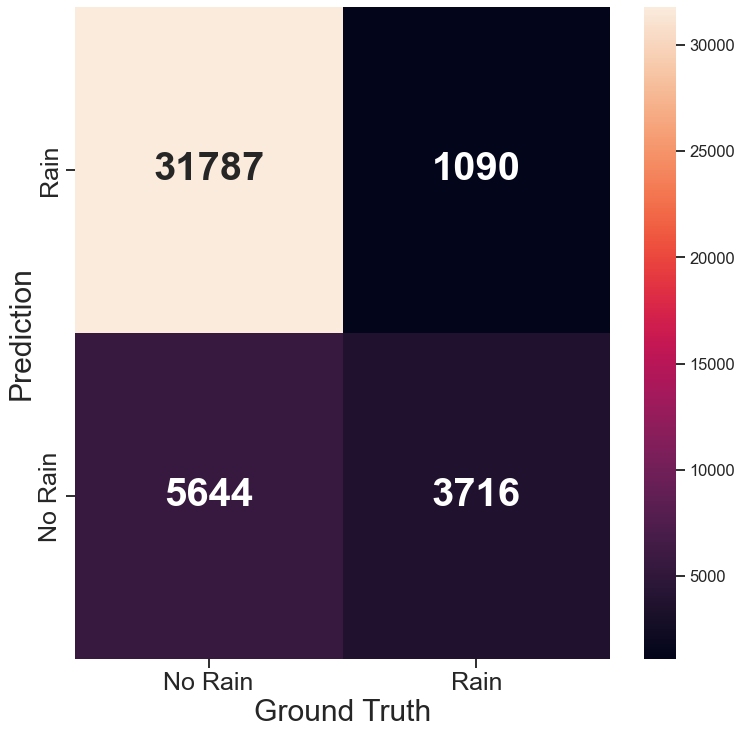

In [95]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['No Rain', 'Rain']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [134]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400,500,600,700,800]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train_ss, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.167549
20.0,0.162374
30.0,0.155880
40.0,0.152877
50.0,0.151131
100.0,0.146920
150.0,0.145723
200.0,0.145104
300.0,0.144252


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

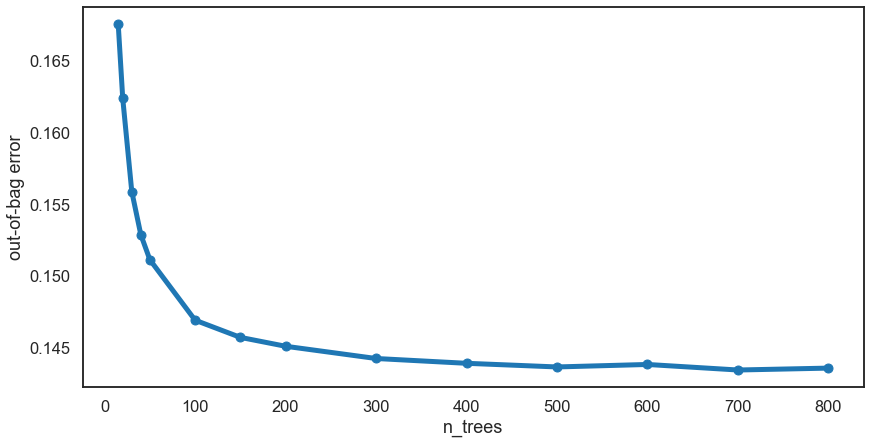

In [137]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [138]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400,500,600,700,800]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train_ss, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.169285
20.0,0.163714
30.0,0.156621
40.0,0.152917
50.0,0.150898
100.0,0.147894
150.0,0.146088
200.0,0.145510
300.0,0.144292


In [139]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.167549,0.169285
20.0,0.162374,0.163714
30.0,0.155880,0.156621
40.0,0.152877,0.152917
50.0,0.151131,0.150898
100.0,0.146920,0.147894
150.0,0.145723,0.146088
200.0,0.145104,0.145510
300.0,0.144252,0.144292


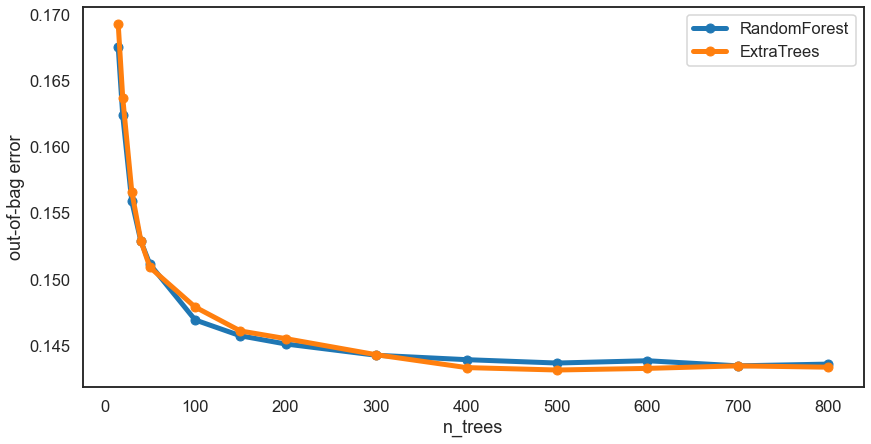

In [140]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [141]:
# Random forest with 100 estimators
model = EF.set_params(n_estimators=500)

y_pred = model.predict(X_test_ss)

In [142]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     32877
           1       0.79      0.50      0.61      9360

    accuracy                           0.86     42237
   macro avg       0.83      0.73      0.76     42237
weighted avg       0.85      0.86      0.85     42237

   accuracy  precision    recall        f1       auc
0  0.859247   0.787313  0.499893  0.611514  0.730723


Text(0.5, 76.5, 'Ground Truth')

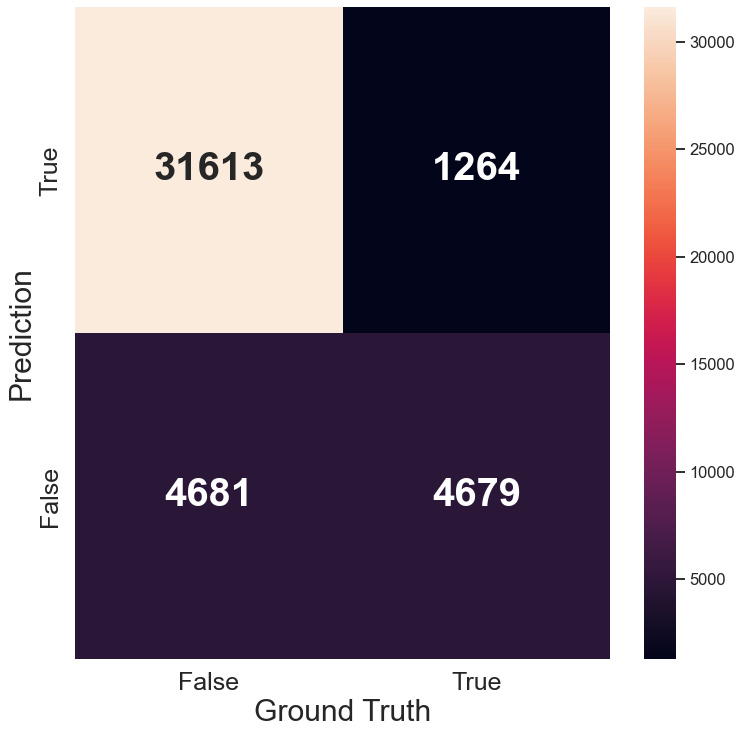

In [143]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

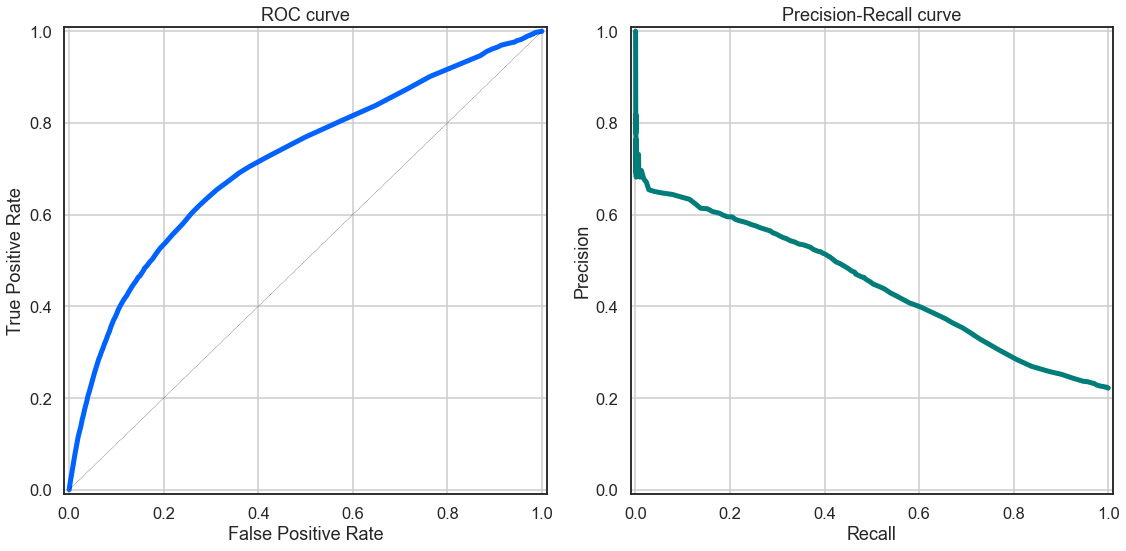

In [144]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

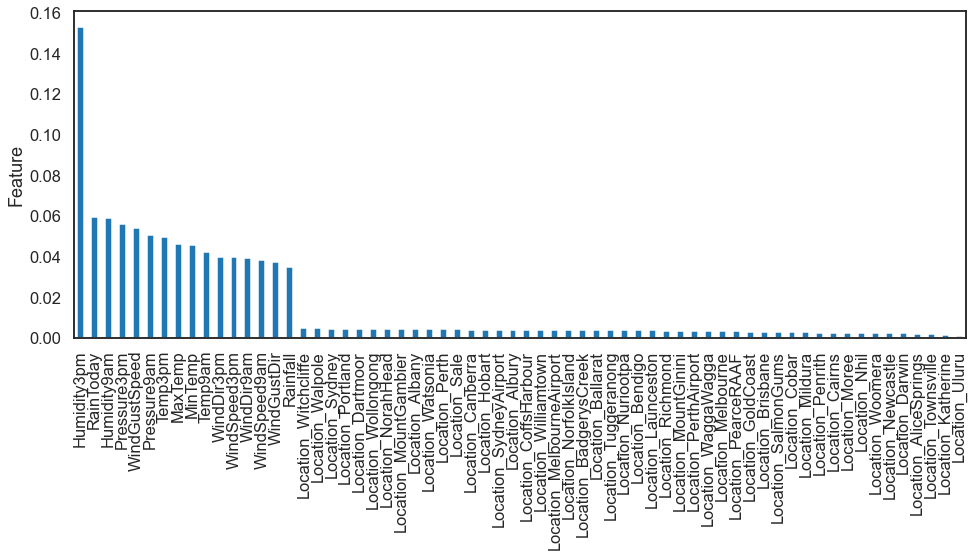

In [145]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

<AxesSubplot:>

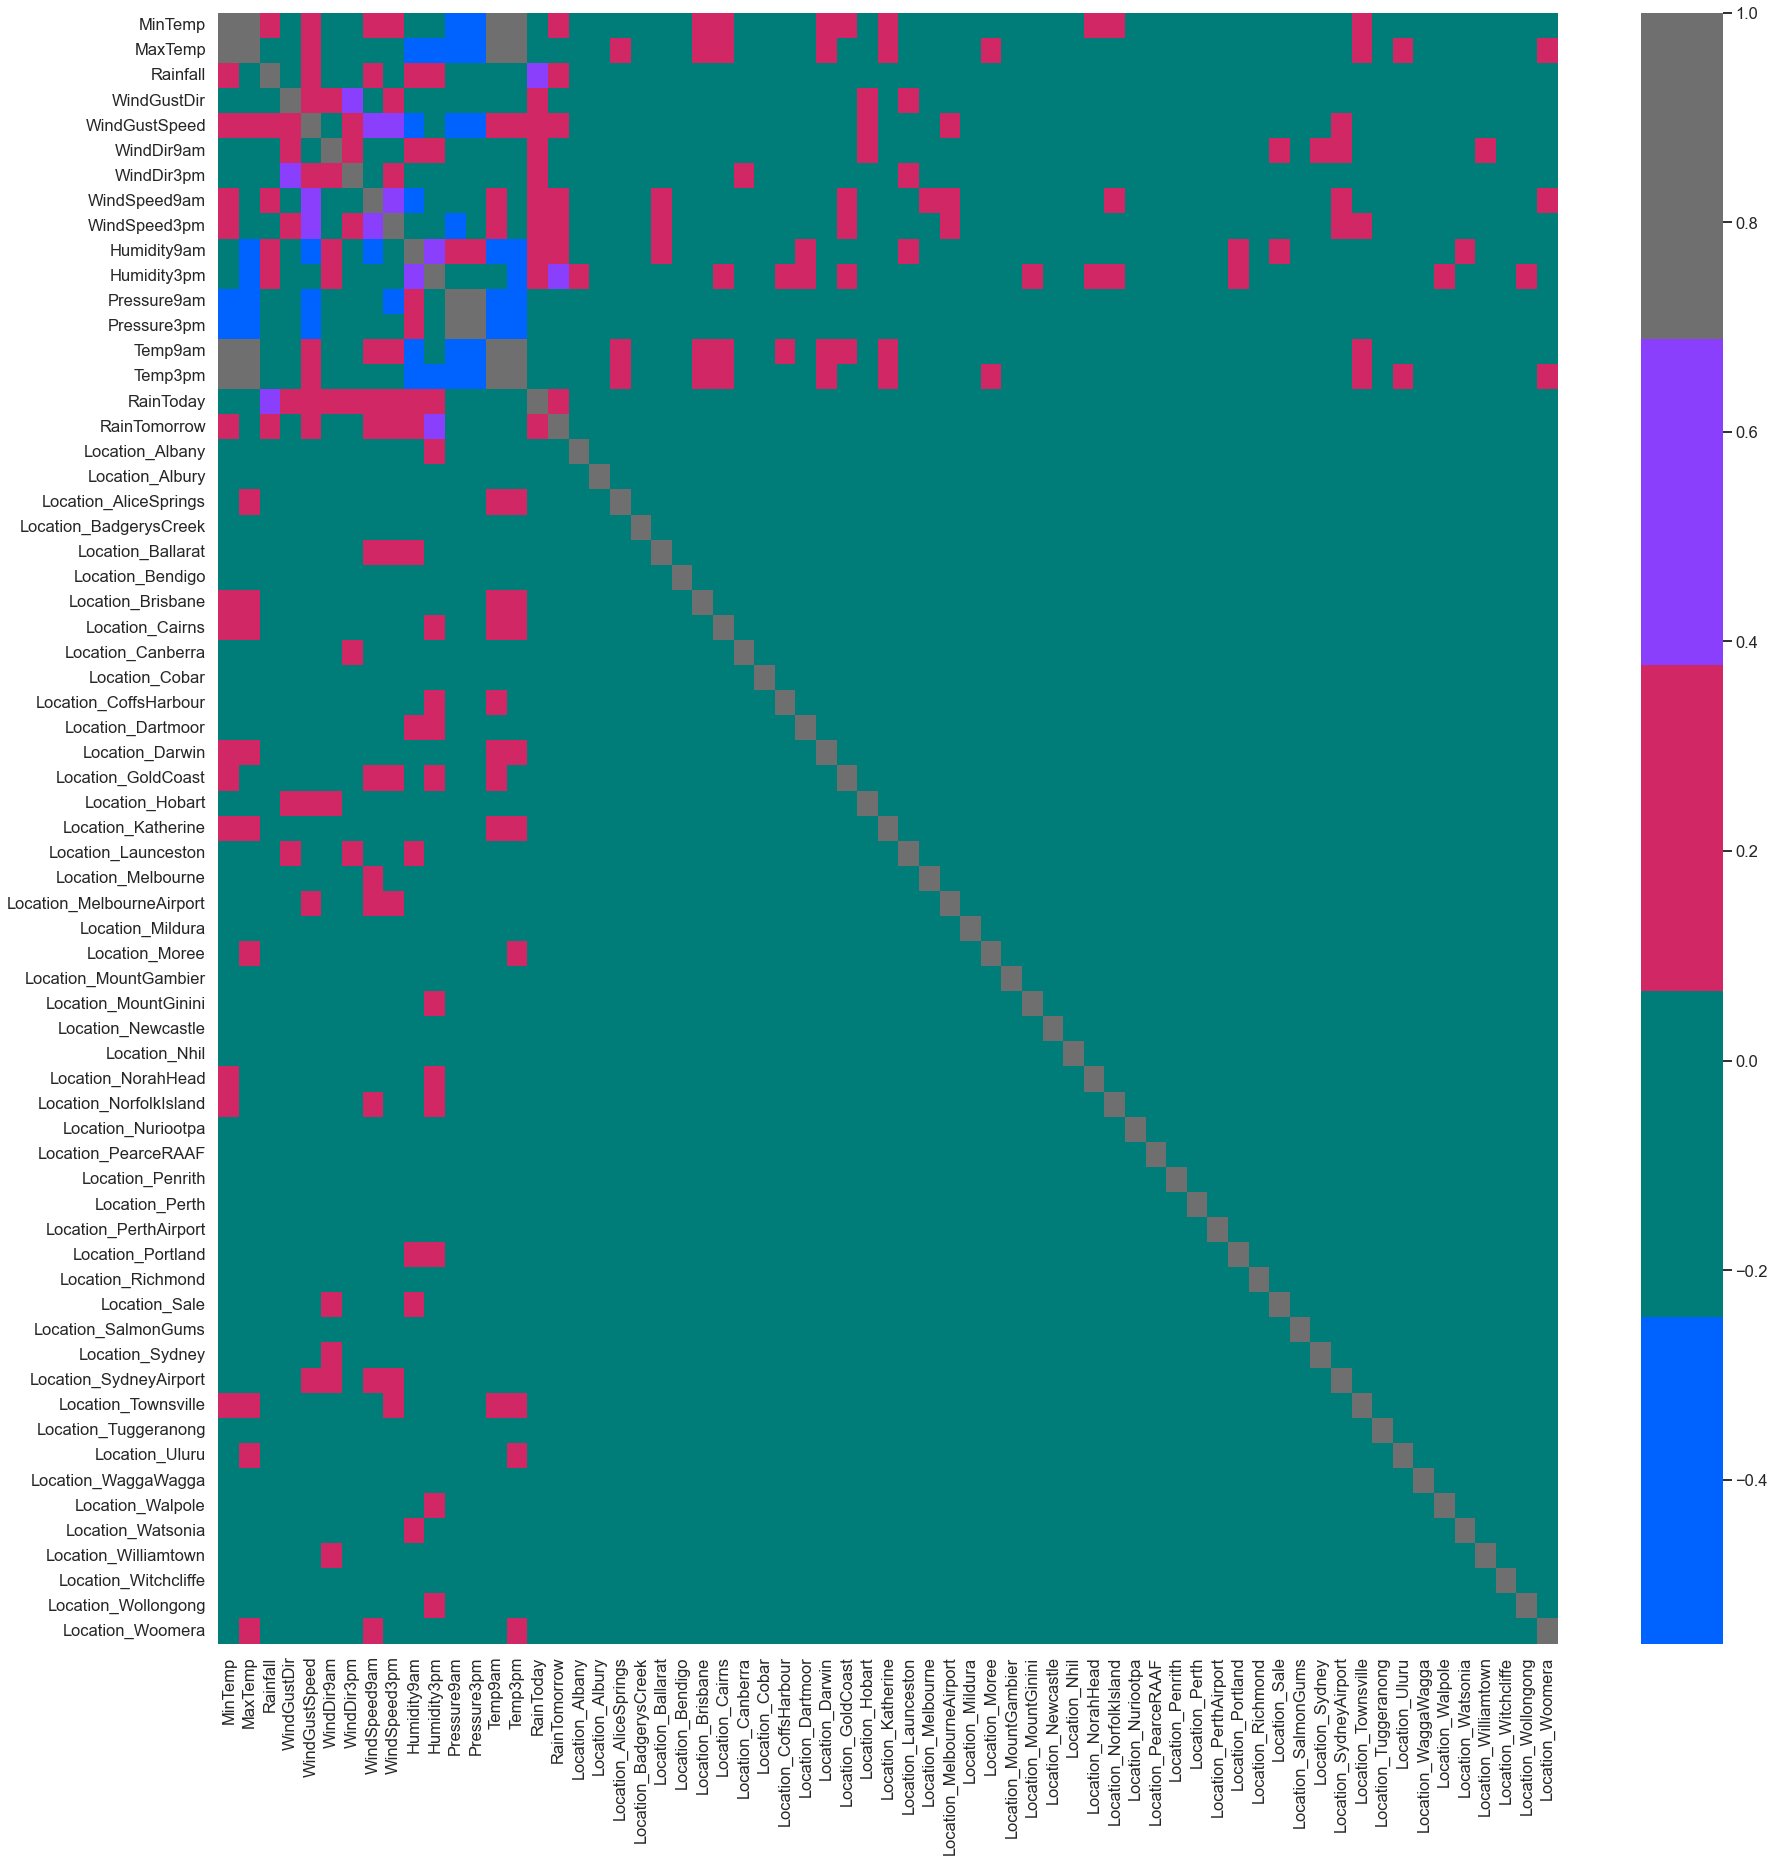

In [155]:
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(weather_df.corr(), cmap=colors)

In [146]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [147]:
kwargs = {'kernel': 'rbf',
          'gamma':.2,
          'random_state':1
          #'n_components':300
         }
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [148]:
X_nystroem = nystroem.fit_transform(X_train_ss)
pd.DataFrame(X_nystroem)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.364269e-10,9.395973e-11,-4.443878e-12,1.676358e-15,8.566119e-14,2.819155e-12,1.842536e-12,-5.771677e-13,-1.377084e-13,-2.786946e-14,...,9.472060e-11,-1.775685e-11,6.541799e-11,7.148826e-11,4.904183e-11,1.647796e-10,2.673673e-10,-7.959516e-07,-2.881091e-12,2.037507e-06
1,-5.600756e-12,1.594712e-09,3.792960e-12,4.529117e-15,2.185594e-13,8.574736e-11,9.766461e-11,1.233763e-12,-6.523965e-14,-1.115582e-14,...,-1.771458e-12,3.328466e-10,-1.211160e-11,-1.909748e-12,6.239318e-12,1.112640e-10,-2.614366e-11,1.631311e-05,2.236192e-10,2.776575e-06
2,2.998465e-10,-7.866210e-11,-6.074356e-13,-1.407722e-15,7.894986e-13,2.010767e-11,-8.174125e-12,4.570928e-13,1.458700e-11,3.439824e-12,...,1.920110e-11,3.289983e-10,2.671072e-10,-1.692072e-11,6.767628e-10,4.058255e-11,8.440738e-10,1.182778e-06,5.560863e-11,2.194666e-06
3,9.828740e-11,-3.535576e-12,2.619332e-13,4.168796e-16,5.806042e-11,1.573069e-11,-8.712652e-13,1.158920e-12,9.087225e-13,-5.717978e-16,...,1.748033e-11,1.091838e-10,6.694600e-10,-1.338694e-12,6.437160e-11,1.207081e-11,1.031154e-10,-2.706540e-08,-1.746873e-12,6.549123e-07
4,3.043139e-14,8.090547e-14,-1.073390e-16,3.011349e-20,-1.583382e-16,1.510657e-14,8.079355e-15,6.948540e-17,2.953979e-16,7.342965e-17,...,2.376816e-15,2.095826e-14,3.139136e-14,2.538267e-15,2.694794e-14,7.546984e-14,7.793291e-14,1.646668e-09,1.344736e-14,3.651448e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,3.046154e-11,7.226112e-10,1.028327e-10,-9.598936e-16,-9.167843e-13,3.164268e-12,1.448744e-10,-1.003054e-12,4.055390e-12,-6.047590e-16,...,8.527981e-11,6.784567e-12,3.135085e-10,9.447651e-10,-1.395391e-11,5.107113e-11,4.768237e-10,1.898701e-06,5.052969e-10,4.433753e-06
98546,2.136190e-10,1.732790e-09,1.114752e-12,-5.060721e-15,-1.932164e-04,2.762163e-11,4.219273e-11,8.357919e-14,2.291284e-12,2.105178e-13,...,6.227557e-12,-5.055959e-11,2.320226e-02,3.246746e-10,-6.392150e-11,3.238300e-10,2.665967e-10,2.475642e-05,2.442432e-09,1.901731e-05
98547,1.033377e-10,-1.266622e-10,-9.408100e-13,3.047540e-14,4.736711e-14,1.290248e-12,-3.454559e-12,3.799629e-13,2.143448e-14,-1.245819e-14,...,2.203372e-11,6.682500e-11,1.255522e-10,-7.713619e-12,3.822020e-11,4.335442e-10,1.708049e-10,-6.361088e-07,-1.245171e-11,1.551680e-05
98548,4.025181e-11,-4.651877e-12,-2.415677e-14,-3.369003e-17,2.211081e-12,1.280646e-12,-4.465656e-13,3.844456e-15,3.617699e-10,2.777838e-12,...,1.651431e-12,1.751168e-12,4.367902e-10,6.005446e-13,9.498649e-11,2.278320e-13,1.538589e-10,5.066939e-08,7.487906e-12,2.827323e-08


In [149]:
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

y_train.shape: (98550,)
y_test.shape: (42237,)


In [150]:
sgd.fit(X_nystroem,y_train)

SGDClassifier()

In [151]:
sgd.score(X_nystroem, y_train)

0.7788635210553019

In [152]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X_train_ss,y_train)

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [153]:
LSVC.score(X_train_ss, y_train)

0.8464129883307966

In [154]:
from sklearn.preprocessing import MinMaxScaler

fields = ['Humidity3pm','RainToday']
print(fields)
X = weather_df[fields]
y = weather_df['RainTomorrow']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

['Humidity3pm', 'RainToday']
Index(['Humidity3pm_scaled', 'RainToday_scaled'], dtype='object')


/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


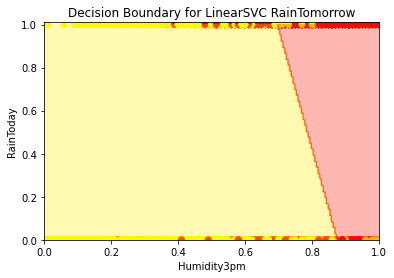

In [155]:
LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(100000, random_state=45)
y_color = y.iloc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1.01],
    title='Decision Boundary for LinearSVC RainTomorrow');

In [156]:
LSVC.score(X, y)

0.8271857486841825

In [159]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.iloc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


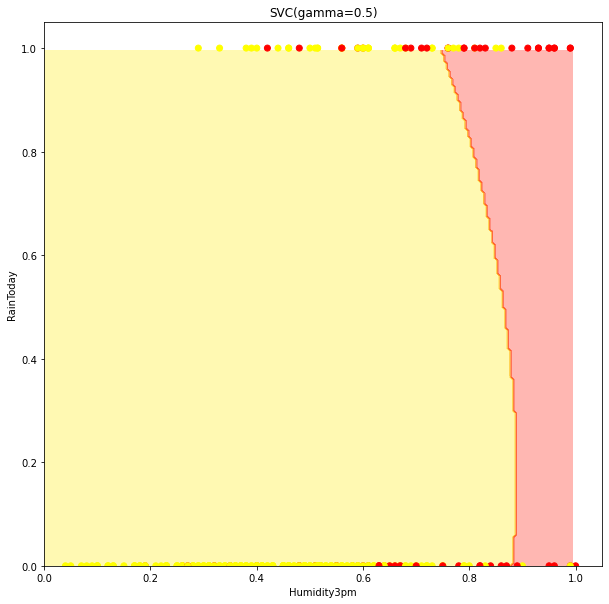

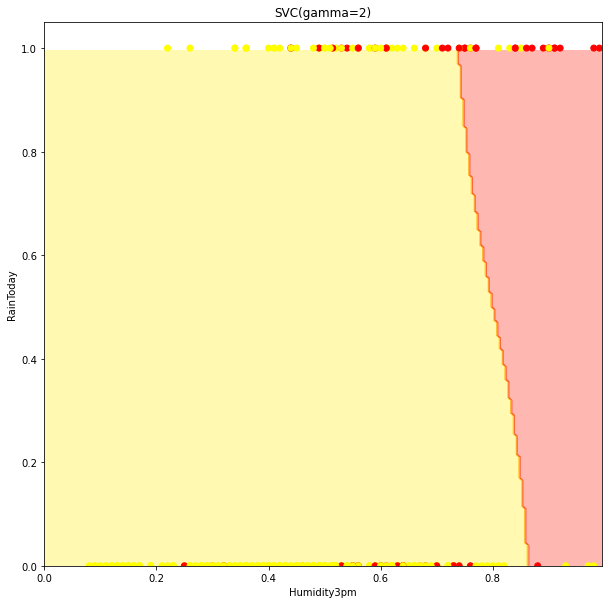

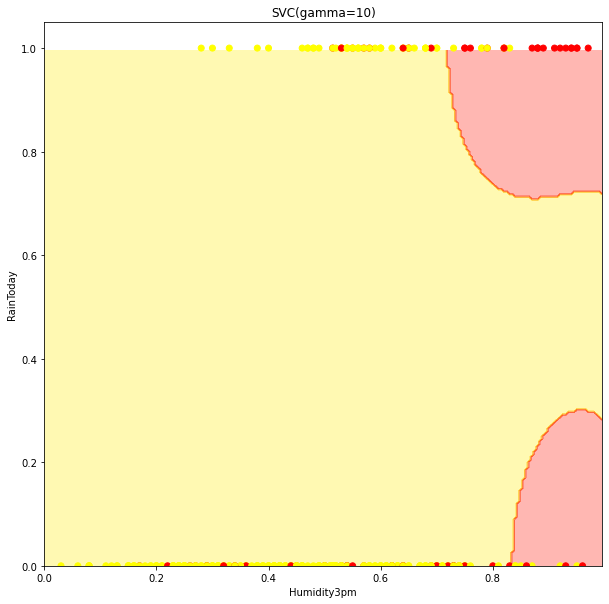

In [160]:
from sklearn.svm import SVC

gammas = [.5, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/rabTorchTensorML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


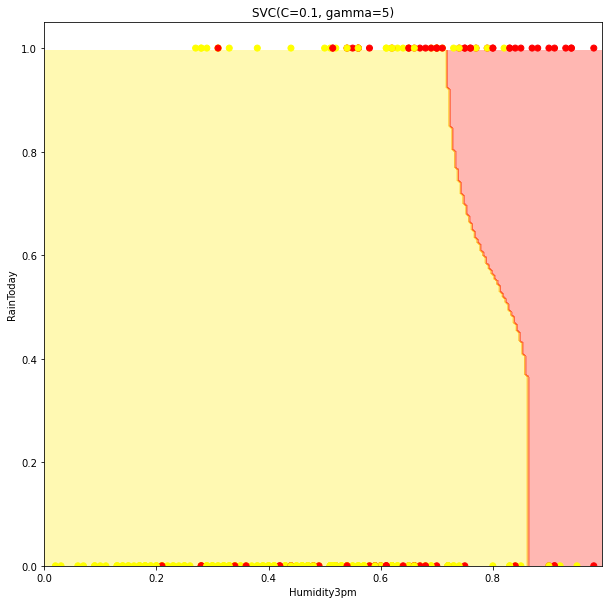

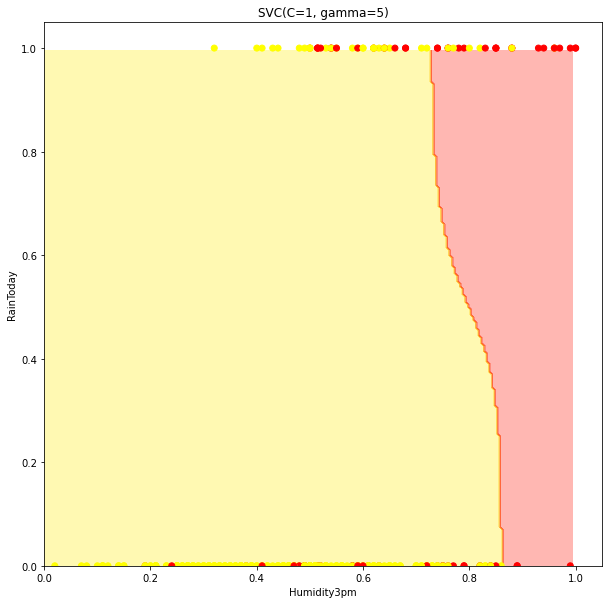

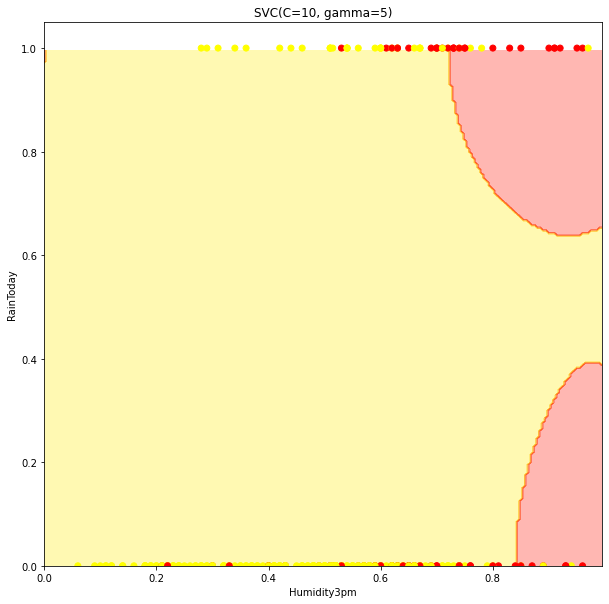

In [161]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=5, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)